# Project on Resume Classification

# Business objective:
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

# A. Text Extraction from Resumes

## A1.Importing Library

In [24]:
# !pip install textract
!pip install pandas
!pip install seaborn
!pip install nltk
!pip install wordcloud
!pip install scikit-learn

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a v

In [25]:
!pip install nltk
!pip install spacy
!pip install gensim

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: numpy
    Found existing installati

In [26]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
full_path = 'resumes categorised'
path=os.listdir(full_path)

In [28]:
file_path1 = []
category1  = []
directory1 = full_path

In [29]:

for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        file_name = os.path.splitext(i)[0]
        category1.append(file_name)

In [30]:
import pandas as pd

In [31]:
data1 = pd.read_csv('all_resumes.csv')
data1.columns = ['Raw_Details','Category1']

# A2. Data Understanding

## A2.1 Number of Words in each Resume

In [32]:
data1.isnull().sum()

Raw_Details    0
Category1      0
dtype: int64

In [33]:
data1

,Raw_Details,Category1
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React
...,...,...
74,\n CURRICULUM VIT...,Reactjs
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,Reactjs
76,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,Reactjs
77,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,Reactjs


In [34]:
data1['Word_Count'] = data1['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
data1[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,361
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,2435
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,404
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",349
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,357


## A2.2 Number of Characters

In [35]:
data1['Char_Count'] = data1['Raw_Details'].str.len() ## this also includes spaces
data1[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,3702
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,6115
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,2669
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",3156
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,2672


## A2.3 Number of Stopwords

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data1['Stopwords'] = data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
data1[['Raw_Details','Stopwords']]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Raw_Details,Stopwords
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,112
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,115
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,106
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",93
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,48
...,...,...
74,\n CURRICULUM VIT...,301
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,86
76,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,64
77,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,67


## A2.4 Number of Numerics

In [37]:
data1['Numerics'] = data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data1[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,2
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,8
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,6
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",5
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,8


In [38]:
data1

,Raw_Details,Category1,Word_Count,Char_Count,Stopwords,Numerics
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React,361,3702,112,2
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React,2435,6115,115,8
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React,404,2669,106,6
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React,349,3156,93,5
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React,357,2672,48,8
...,...,...,...,...,...,...
74,\n CURRICULUM VIT...,Reactjs,26196,35291,301,26
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,Reactjs,435,3299,86,4
76,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,Reactjs,474,3111,64,9
77,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,Reactjs,945,2967,67,4


# A3. Text Pre-Processing

## A3.1 Using Regular Expression

In [39]:
from nltk.tokenize import RegexpTokenizer

In [40]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [41]:
data1['Resume_Details'] = data1.Raw_Details.apply(lambda x: preprocess(x))

## A3.2 Clean Text from Resume

In [42]:
data1

,Raw_Details,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React,361,3702,112,2,developer react developer name krishna profess...
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React,2435,6115,115,8,pic profile searching opportunity bring years ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React,404,2669,106,6,haripriya battina experience developer reactjs...
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React,349,3156,93,5,sarala madasu sarala madasu sri geethika prest...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React,357,2672,48,8,kamalakar reddy linked professional summary ye...
...,...,...,...,...,...,...,...
74,\n CURRICULUM VIT...,Reactjs,26196,35291,301,26,curriculum vitae anjani priyadarshini objectiv...
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,Reactjs,435,3299,86,4,ranga gaganam professional summary professiona...
76,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,Reactjs,474,3111,64,9,shaik abdul sharuk years experience wipro care...
77,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,Reactjs,945,2967,67,4,mareedu lokesh babu professional overview arou...


## A3.3 Save the Clean Data in new CSV File

In [43]:
data1.drop(['Raw_Details'], axis = 1, inplace = True)
data1

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,React,361,3702,112,2,developer react developer name krishna profess...
1,React,2435,6115,115,8,pic profile searching opportunity bring years ...
2,React,404,2669,106,6,haripriya battina experience developer reactjs...
3,React,349,3156,93,5,sarala madasu sarala madasu sri geethika prest...
4,React,357,2672,48,8,kamalakar reddy linked professional summary ye...
...,...,...,...,...,...,...
74,Reactjs,26196,35291,301,26,curriculum vitae anjani priyadarshini objectiv...
75,Reactjs,435,3299,86,4,ranga gaganam professional summary professiona...
76,Reactjs,474,3111,64,9,shaik abdul sharuk years experience wipro care...
77,Reactjs,945,2967,67,4,mareedu lokesh babu professional overview arou...


In [44]:
data1.to_csv('Cleaned_Resumes.csv', index = False)

In [45]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,React,361,3702,112,2,developer react developer name krishna profess...
1,React,2435,6115,115,8,pic profile searching opportunity bring years ...
2,React,404,2669,106,6,haripriya battina experience developer reactjs...
3,React,349,3156,93,5,sarala madasu sarala madasu sri geethika prest...
4,React,357,2672,48,8,kamalakar reddy linked professional summary ye...
...,...,...,...,...,...,...
74,Reactjs,26196,35291,301,26,curriculum vitae anjani priyadarshini objectiv...
75,Reactjs,435,3299,86,4,ranga gaganam professional summary professiona...
76,Reactjs,474,3111,64,9,shaik abdul sharuk years experience wipro care...
77,Reactjs,945,2967,67,4,mareedu lokesh babu professional overview arou...


In [46]:
resume_data.Resume_Details[5]

'thirupathamma balla summary year experience react developer worked technologies like react javascript experience developing business applications internet using react experience object oriented programming concepts strong analytical ability skills enthusiastic eager meet challenges quick learn assimilate new concepts ideas ability work efficiently either independently team minimal supervision without ever missing deadline brief profile work experience year current employer predifast technologies private limited react developer industry software software services highest degree tech eee current hyderabad date birth gender november summary skills experience work experience duration mar till date company predifast technologies private limited designation react developer job profile develop javascript based applications using react technical skills languages web technologies react bootstrap javascript json education course institution percentage year passing electrical electronics enginee

# A4. Named Entity Recognition (NER)

In [47]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/its_relative/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('role', 142), ('oracle', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


# A5. Parts Of Speech (POS) Tagging

In [49]:
import spacy

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [50]:
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [51]:
for token in doc_block[:30]:
    print(token,token.pos_)  

project NOUN
role NOUN
developer NOUN
react VERB
developer NOUN
responsibilities NOUN
design NOUN
develop VERB
test PROPN
html PROPN
css PROPN
bootstrap PROPN
javascript PROPN
react VERB
meets VERB
accessibility NOUN
web NOUN
browser NOUN
standards NOUN
website NOUN
developed VERB
user NOUN
interface NOUN
using VERB
react NOUN
flux NOUN
spa NOUN
development NOUN
used VERB
react VERB


## A5.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [52]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['developer', 'react', 'developer', 'name', 'summary', 'years', 'experience', 'react', 'web', 'developer', 'year', 'react', 'software', 'developer', 'experience', 'developing', 'web', 'pages', 'using', 'react', 'experience', 'phase', 'requirement', 'analysis', 'implementation', 'maintenance', 'experience', 'scrum', 'knowledge', 'developing', 'page', 'applications', 'spas', 'expertise', 'analyzing', 'document', 'object', 'model', 'script', 'functions', 'cascading', 'styles', 'cross', 'browser', 'using', 'fire', 'bug', 'developer', 'tool', 'bar', 'expertise', 'react', 'framework', 'develop', 'spa', 'experienced', 'working', 'react', 'flux', 'architecture', 'experienced', 'working', 'redux', 'architecture', 'using', 'object', 'oriented', 'concepts', 'improving', 'performance', 'websites', 'experience', 'using', 'react', 'components', 'forms', 'events', 'keys', 'router', 'redux', 'animations', 'expertise', 'video', 'coding', 'using', 'expertise', 'soap', 'web', 'services', 'integrate', 'ap

## A5.2 Counting all the Nouns and Verbs present in the Tokens of words

In [53]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,544
1,application,411
2,using,394
3,reports,326
4,workday,314
5,data,309
6,project,300
7,business,262
8,web,250
9,database,240


## A5.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

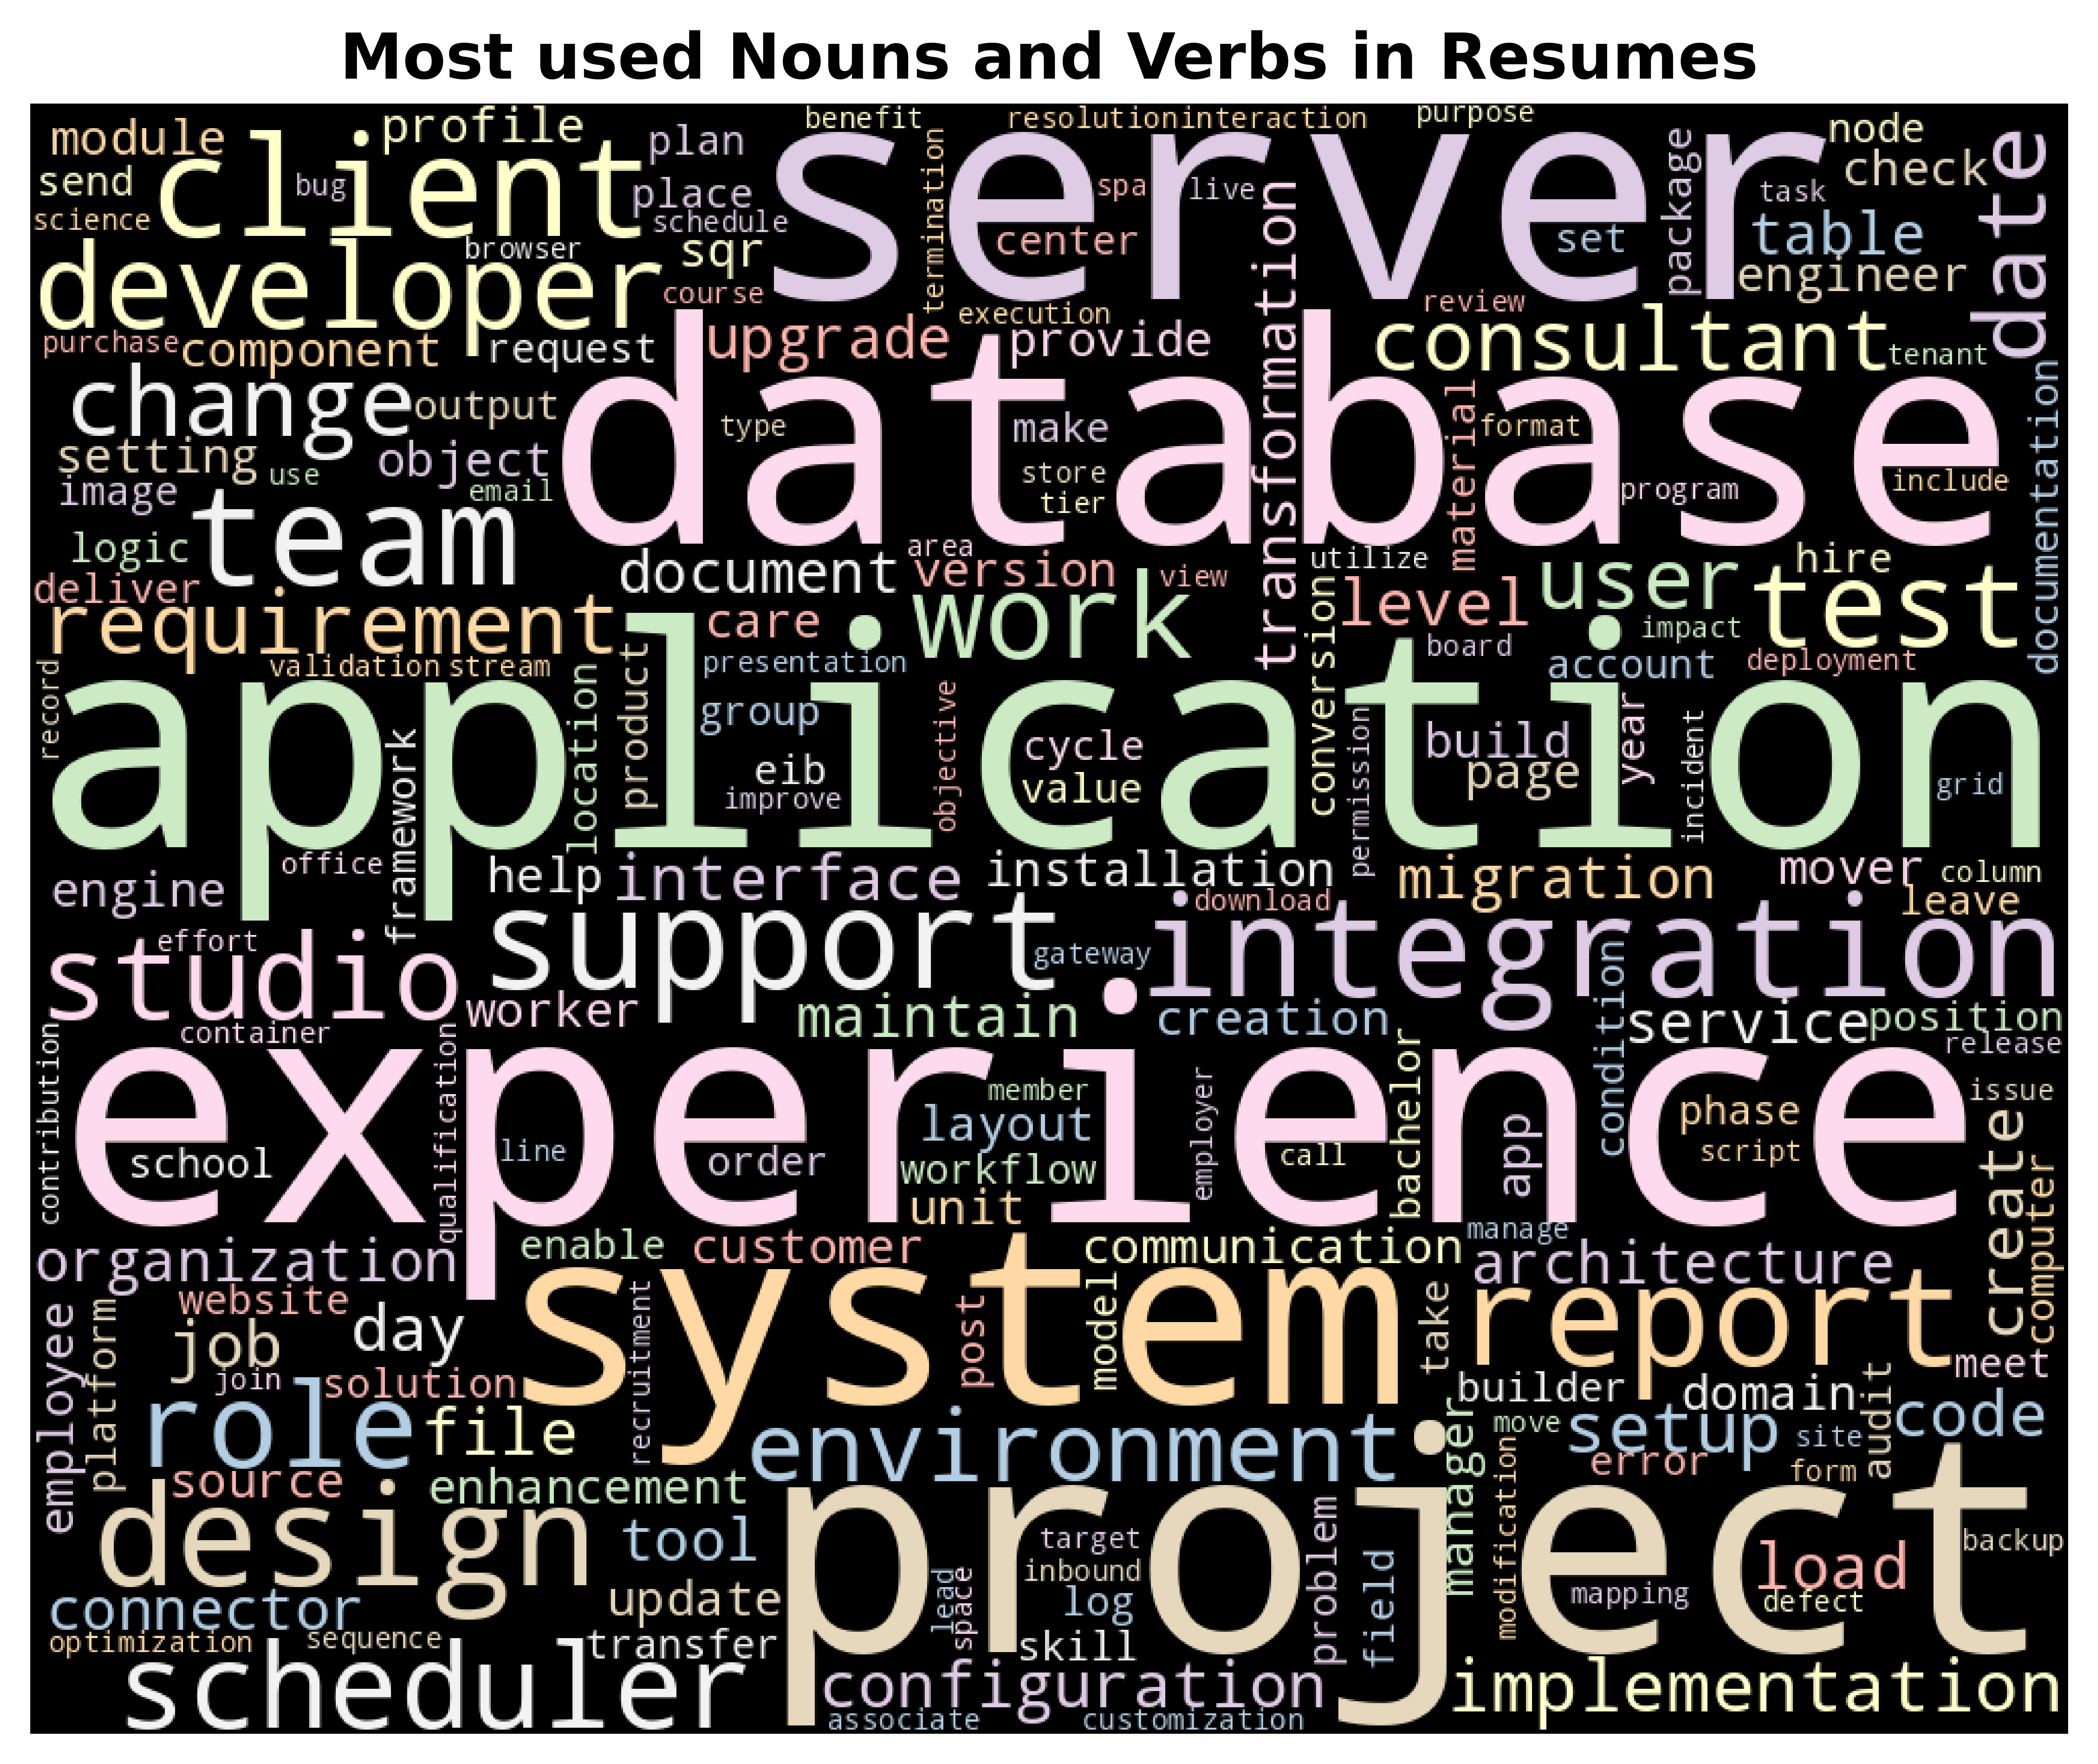

In [54]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# B. Exploratory Data Analytics (EDA)

In [55]:
!pip install textblob

In [56]:
# Import Libraries
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
file_path   = './resumes categorised'
print (os.listdir(file_path))

['React', 'SQL Developer Lightning insight', 'Peoplesoft resumes', 'internship', 'workday resumes', 'Reactjs']


In [58]:
file_path   = './resumes categorised/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [59]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52
Total Number of Files =  79


# B1.1 Type of File Format

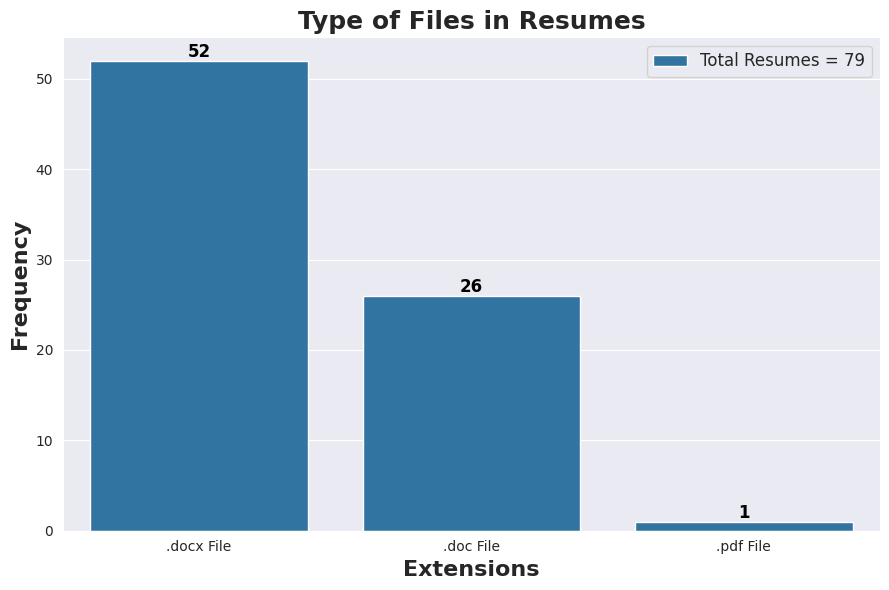

In [60]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

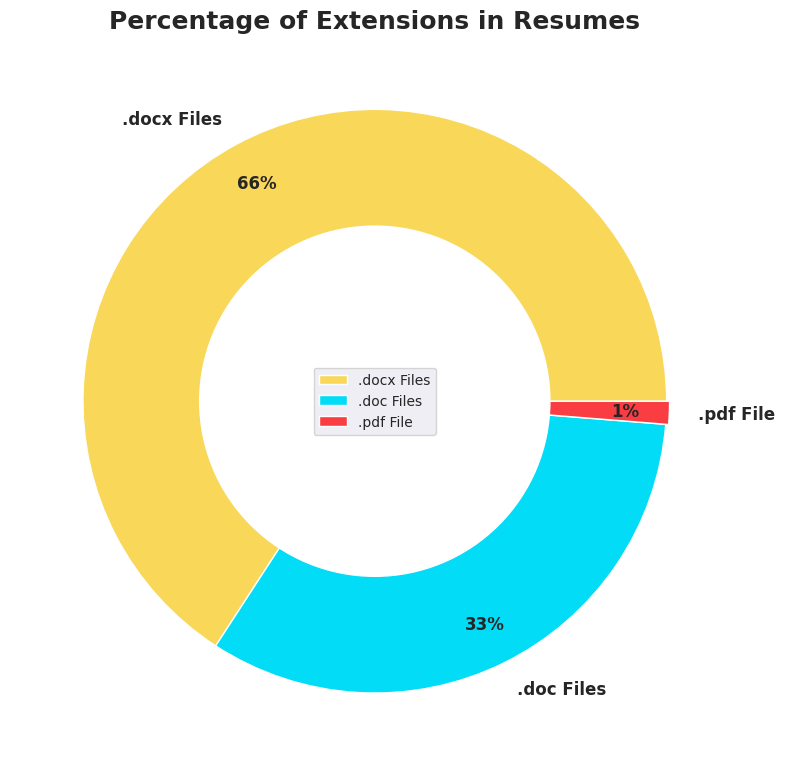

In [61]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# B2. Extract Resumes by Profile Category

In [62]:
file_path   = './resumes categorised/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [63]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,React,React Developer_Deepakreddy.docx
1,React,React Dev_Krishna Kanth.docx
2,React,React Developer_Vinay Reddy.doc
3,React,React Developer_Thirupathiamma.docx
4,React,React Developer_PavasGoswami.doc
...,...,...
74,Reactjs,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...
75,Reactjs,Reactjs Developer_M Lokesh Babu_Musquare Techn...
76,Reactjs,Reactjs Developer_Ranga Gaganam_Musquare Techn...
77,Reactjs,Reactjs Developer_M Lokesh.docx


In [64]:
resume_data.Profile.value_counts().index

Index(['workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight', 'React', 'Reactjs', 'internship'],
      dtype='object', name='Profile')

In [65]:
resume_data.Profile.value_counts()

Profile
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
React                              11
Reactjs                            11
internship                          2
Name: count, dtype: int64

# B2.1 Number of Total Resumes

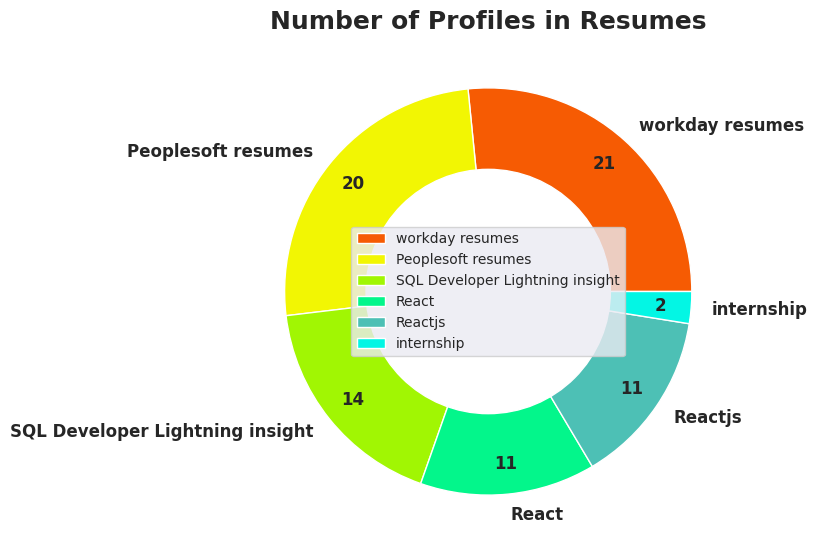

In [66]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [67]:
# fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
# ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), data= resume_data,
#                  ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

# axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
# axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
# plt.xticks(rotation = 10)
# plt.legend(loc='best', fontsize= 'x-large')
# plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

# for i in ax.containers:
#     ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
# pylab.rcParams.update(rcParams)
# fig.tight_layout()
# plt.show()

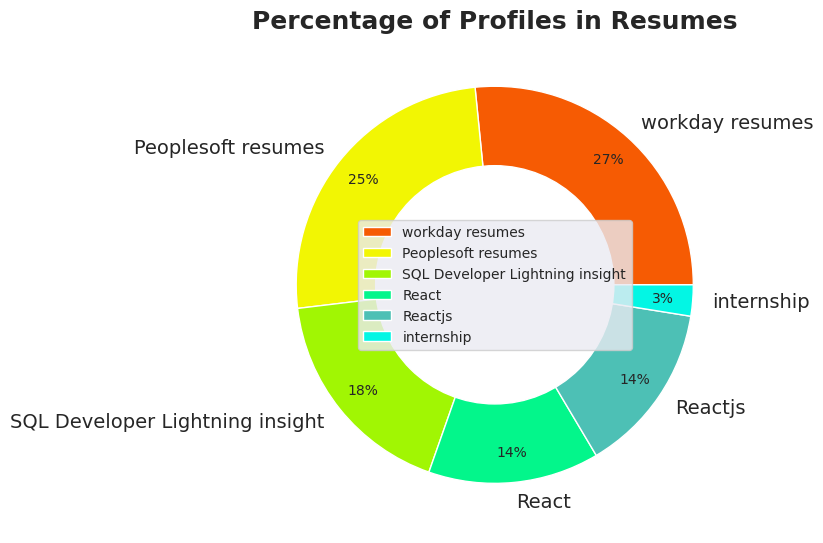

In [68]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, 
        startangle= 0)

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# B3. Reading a Resume File

In [69]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('./resumes categorised/React/React Developer_Deepakreddy.docx'))

Kanumuru Deepak Reddy



 



CAREER OBJECTIVE:



To secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.



ACADEMIC QUALIFICATIONS:





Qualification

Institute

Board (or) University

Year of completion

Percentage/CGPA

B.Tech (E.C.E)

Audisankara College of Engineering & Technology,Gudur.

JNTU Anantapur.

2018

77.3

Intermediate

Narayana Junior college, Naidupet.

Board of

Intermediate, AP.

2014

89.5

SSC

Navodaya High School,Naidupet

Board of Secondary education, AP.

2012

6.7



PROJECT:



Title :Density based Traffic Control System USING ARDUINO.



Duration:4 months.



Description: Traffic congestion is a severe problem in most of the cities across the world and it has become a nightmare for the citizens. It is caused by delay in signal, inappropriate timing of traffic signalling etc. The delay of traffic light is hard coded and it does not depend 

# B4. Data Exploration

In [70]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,React,361,3702,112,2,developer react developer name krishna profess...
1,React,2435,6115,115,8,pic profile searching opportunity bring years ...
2,React,404,2669,106,6,haripriya battina experience developer reactjs...
3,React,349,3156,93,5,sarala madasu sarala madasu sri geethika prest...
4,React,357,2672,48,8,kamalakar reddy linked professional summary ye...
...,...,...,...,...,...,...
74,Reactjs,26196,35291,301,26,curriculum vitae anjani priyadarshini objectiv...
75,Reactjs,435,3299,86,4,ranga gaganam professional summary professiona...
76,Reactjs,474,3111,64,9,shaik abdul sharuk years experience wipro care...
77,Reactjs,945,2967,67,4,mareedu lokesh babu professional overview arou...


# B4.1 N-grams

In [71]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['pic']),
 WordList(['profile']),
 WordList(['searching']),
 WordList(['opportunity']),
 WordList(['bring']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['software']),
 WordList(['developing']),
 WordList(['technology']),
 WordList(['engineering']),
 WordList(['designing']),
 WordList(['maintenance']),
 WordList(['cater']),
 WordList(['specific']),
 WordList(['needs']),
 WordList(['people']),
 WordList(['critical']),
 WordList(['thinking']),
 WordList(['problem'])]

In [72]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['pic', 'profile']),
 WordList(['profile', 'searching']),
 WordList(['searching', 'opportunity']),
 WordList(['opportunity', 'bring']),
 WordList(['bring', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'software']),
 WordList(['software', 'developing']),
 WordList(['developing', 'technology']),
 WordList(['technology', 'engineering']),
 WordList(['engineering', 'designing']),
 WordList(['designing', 'maintenance']),
 WordList(['maintenance', 'cater']),
 WordList(['cater', 'specific']),
 WordList(['specific', 'needs']),
 WordList(['needs', 'people']),
 WordList(['people', 'critical']),
 WordList(['critical', 'thinking']),
 WordList(['thinking', 'problem']),
 WordList(['problem', 'solving'])]

In [73]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['pic', 'profile', 'searching']),
 WordList(['profile', 'searching', 'opportunity']),
 WordList(['searching', 'opportunity', 'bring']),
 WordList(['opportunity', 'bring', 'years']),
 WordList(['bring', 'years', 'experience']),
 WordList(['years', 'experience', 'software']),
 WordList(['experience', 'software', 'developing']),
 WordList(['software', 'developing', 'technology']),
 WordList(['developing', 'technology', 'engineering']),
 WordList(['technology', 'engineering', 'designing']),
 WordList(['engineering', 'designing', 'maintenance']),
 WordList(['designing', 'maintenance', 'cater']),
 WordList(['maintenance', 'cater', 'specific']),
 WordList(['cater', 'specific', 'needs']),
 WordList(['specific', 'needs', 'people']),
 WordList(['needs', 'people', 'critical']),
 WordList(['people', 'critical', 'thinking']),
 WordList(['critical', 'thinking', 'problem']),
 WordList(['thinking', 'problem', 'solving']),
 WordList(['problem', 'solving', 'leadership'])]

In [74]:
resume_data['Resume_Details']

0     developer react developer name krishna profess...
1     pic profile searching opportunity bring years ...
2     haripriya battina experience developer reactjs...
3     sarala madasu sarala madasu sri geethika prest...
4     kamalakar reddy linked professional summary ye...
                            ...                        
74    curriculum vitae anjani priyadarshini objectiv...
75    ranga gaganam professional summary professiona...
76    shaik abdul sharuk years experience wipro care...
77    mareedu lokesh babu professional overview arou...
78    venkatalakshmi pedireddy software developer ex...
Name: Resume_Details, Length: 79, dtype: object

# B4.2 Top 20 most used words in Resumes

## B4.2.1 Using the Word Cloud

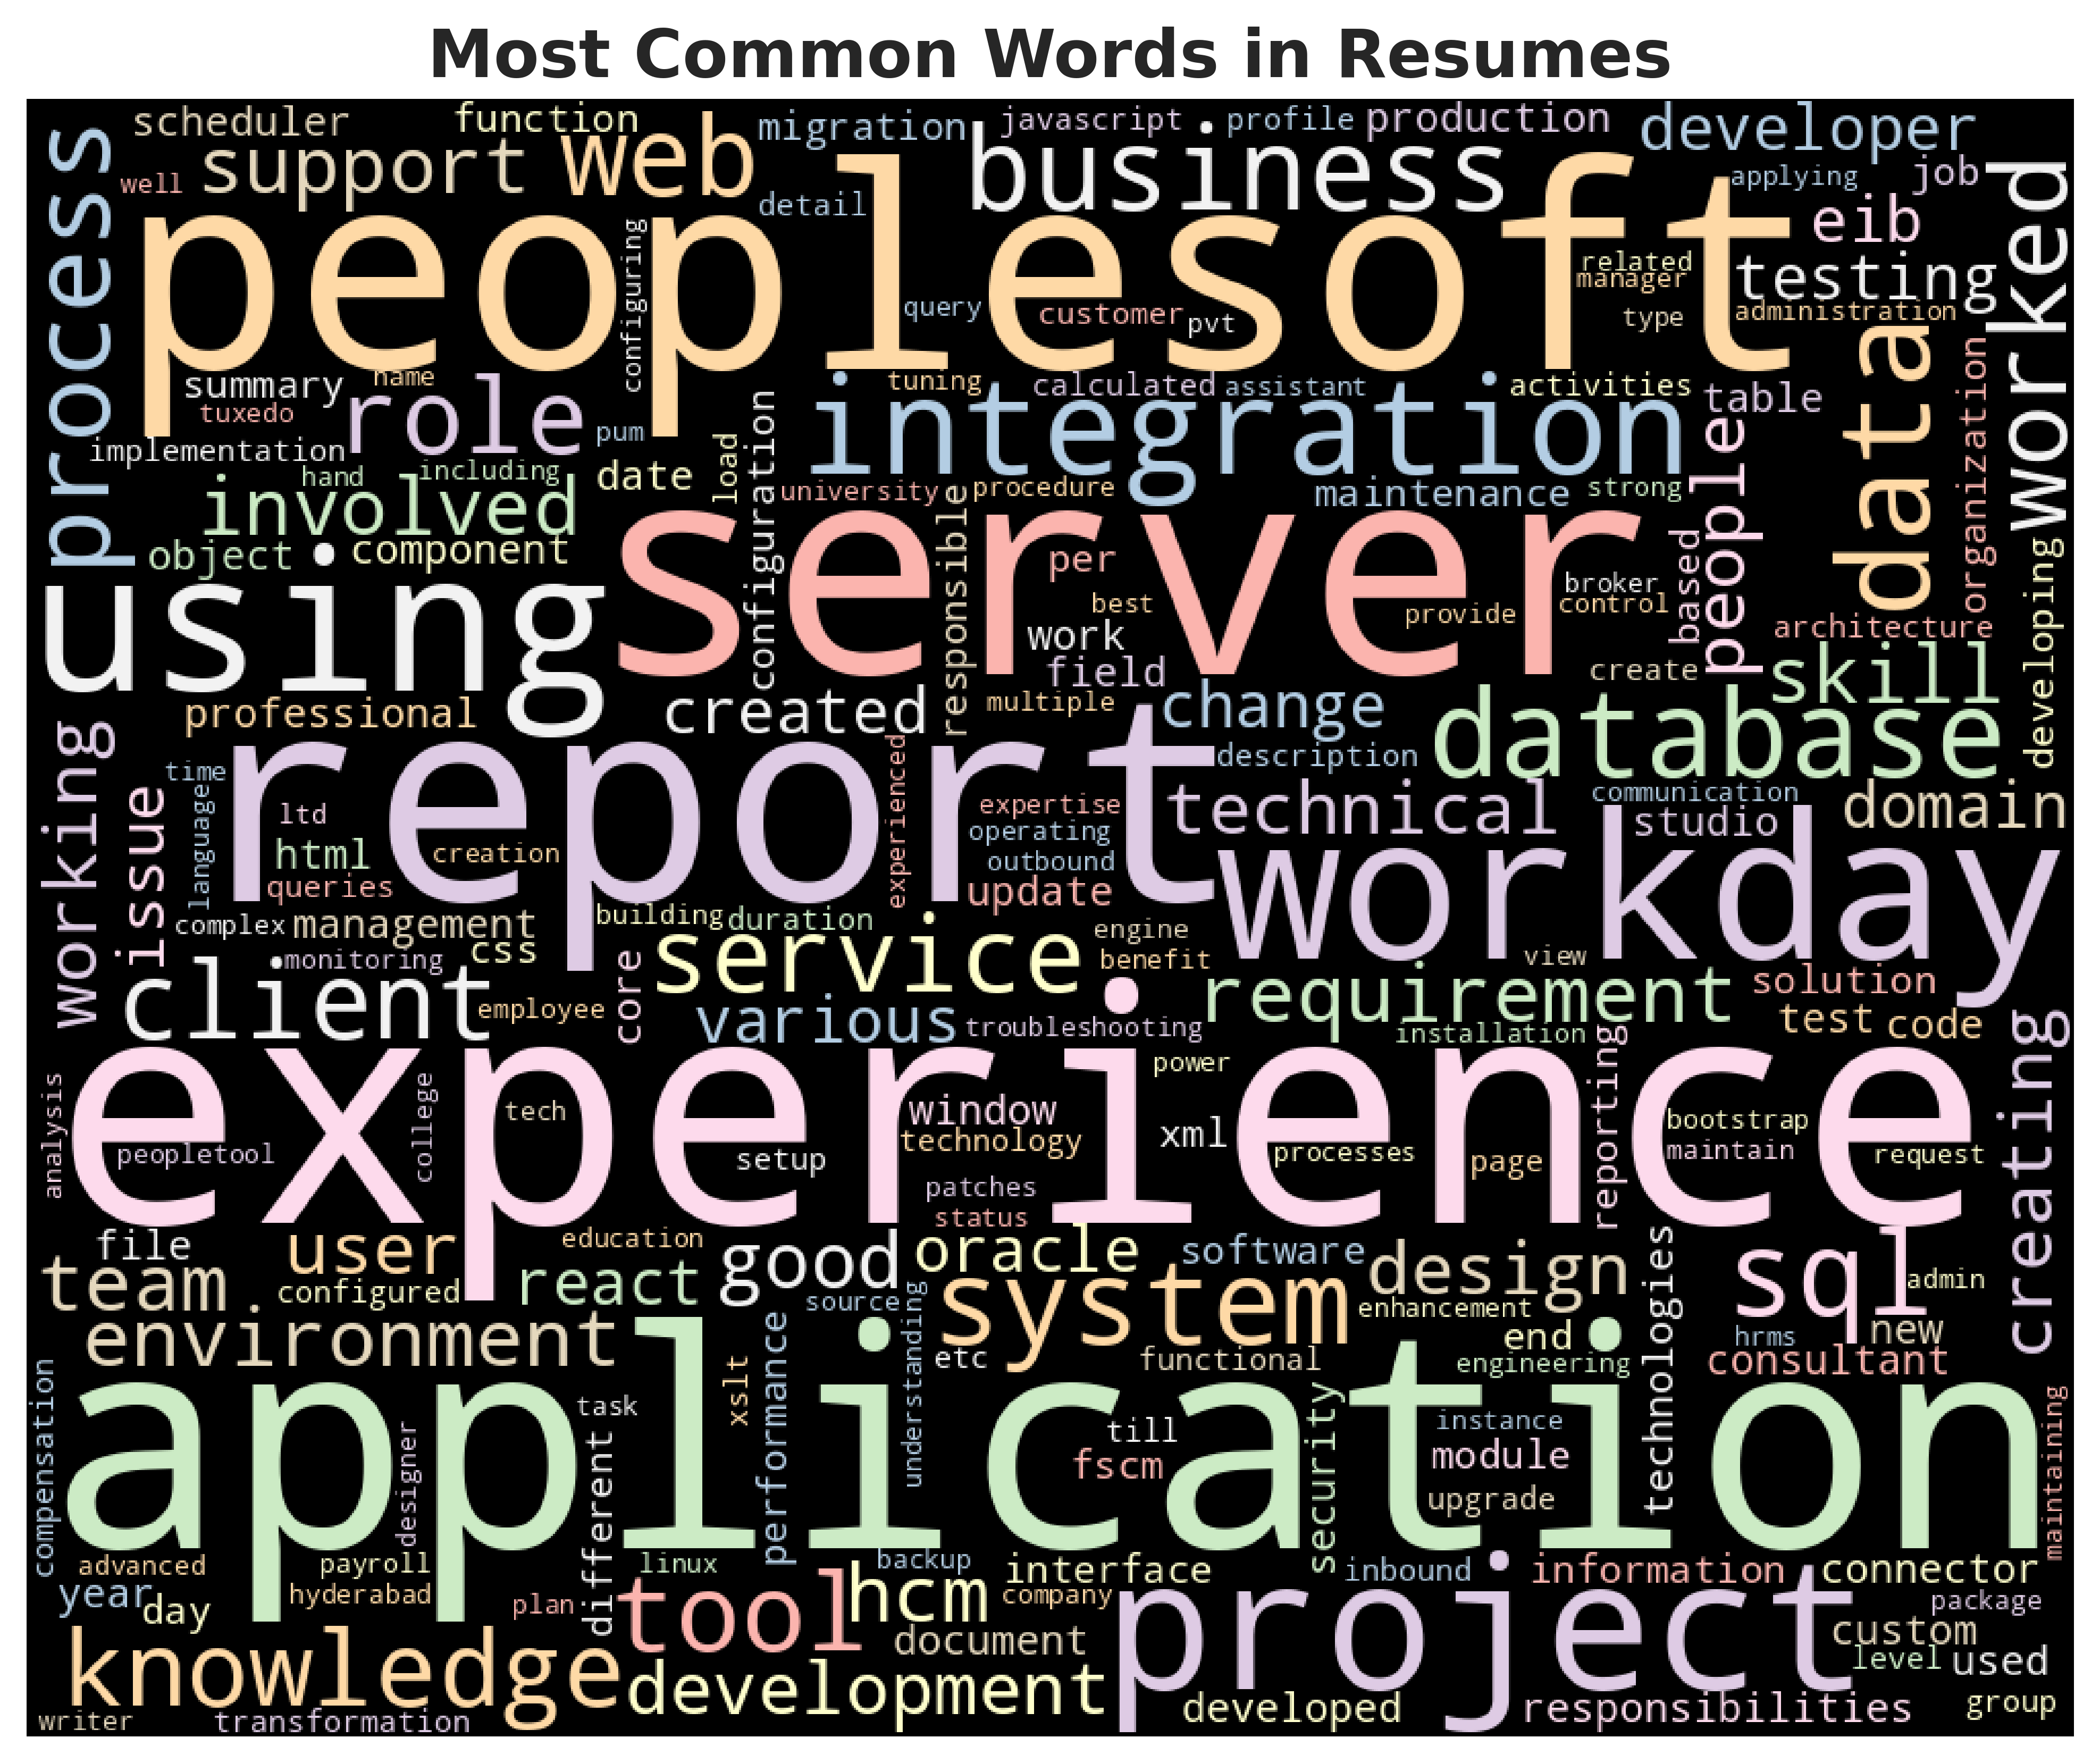

In [75]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# C. Model Buidling

# C1. Import Library 

In [76]:
!pip install xgboost

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score


import warnings
warnings.filterwarnings('ignore')

# C2. Load Data

# C3. Data Preprocessing

## 3.1 LabelEncoder

In [78]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category1"])

resume_data

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details,LebelEncoding
0,React,361,3702,112,2,developer react developer name krishna profess...,1
1,React,2435,6115,115,8,pic profile searching opportunity bring years ...,1
2,React,404,2669,106,6,haripriya battina experience developer reactjs...,1
3,React,349,3156,93,5,sarala madasu sarala madasu sri geethika prest...,1
4,React,357,2672,48,8,kamalakar reddy linked professional summary ye...,1
...,...,...,...,...,...,...,...
74,Reactjs,26196,35291,301,26,curriculum vitae anjani priyadarshini objectiv...,2
75,Reactjs,435,3299,86,4,ranga gaganam professional summary professiona...,2
76,Reactjs,474,3111,64,9,shaik abdul sharuk years experience wipro care...,2
77,Reactjs,945,2967,67,4,mareedu lokesh babu professional overview arou...,2


In [79]:
resume_data.describe()

,Word_Count,Char_Count,Stopwords,Numerics,LebelEncoding
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1569.025316,6252.569620,157.278481,6.784810,2.379747
std,3061.696551,4914.965484,103.301517,5.443582,1.930217
min,181.000000,1773.000000,34.000000,0.000000,0.000000
25%,495.000000,3376.500000,90.500000,3.000000,0.500000
50%,769.000000,4819.000000,136.000000,6.000000,2.000000
75%,1594.000000,7839.500000,194.000000,8.000000,5.000000
max,26196.000000,35291.000000,640.000000,26.000000,5.000000


In [80]:
resume_data.isnull().sum()

Category1         0
Word_Count        0
Char_Count        0
Stopwords         0
Numerics          0
Resume_Details    0
LebelEncoding     0
dtype: int64

# C4. Model Building

## C4.1 Train - Test Split

In [81]:
x = resume_data['Resume_Details'].values
y = resume_data['Category1'].values

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

## C4.2 TF-IDF Vectorization

In [83]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [84]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)
x_train.shape, x_test.shape

((59, 3672), (20, 3672))

In [85]:
print(y_train),print(y_test)

['Peoplesoft resumes' 'Reactjs' 'Peoplesoft resumes' 'workday resumes'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'React' 'Peoplesoft resumes' 'SQL Developer Lightning insight'
 'Peoplesoft resumes' 'React' 'SQL Developer Lightning insight' 'Reactjs'
 'React' 'workday resumes' 'React' 'internship'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'Reactjs'
 'Reactjs' 'workday resumes' 'Peoplesoft resumes' 'Peoplesoft resumes'
 'Peoplesoft resumes' 'SQL Developer Lightning insight' 'workday resumes'
 'workday resumes' 'workday resumes' 'Reactjs' 'workday resumes' 'React'
 'SQL Developer Lightning insight' 'workday resumes' 'Reactjs'
 'workday resumes' 'SQL Developer Lightning insight' 'workday resumes'
 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'workday resumes'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'workday resumes'
 'Peoplesoft resumes' 'internship' 'workday resumes' 'workday res

(None, None)

## C4.3 Word2Vec Vectorization

### C4.3.1 Loading original Dataset for processing

In [86]:
original_df = pd.read_csv("all_resumes.csv")

In [87]:
original_df


,Resume,Category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React
...,...,...
74,\n CURRICULUM VIT...,Reactjs
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,Reactjs
76,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,Reactjs
77,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,Reactjs


In [88]:
# print(original_df.iloc[1,0])

In [89]:
original_df.columns

Index(['Resume', 'Category'], dtype='object')

In [90]:
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ensure you have downloaded necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

documents_org = original_df["Resume"]

labels_org = original_df["Category"]  # Corresponding categories

# Preprocessing function
def org_preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

preprocessed_documents = [org_preprocess(doc) for doc in documents_org]


In [91]:
# Train Word2Vec model
word2vec_model_org = Word2Vec(sentences=preprocessed_documents, vector_size=100, window=5, min_count=1, workers=4)


In [92]:
def document_vector_org(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model_org.wv.key_to_index]
    return np.mean(word2vec_model_org.wv[doc], axis=0)

document_vectors_org = np.array([document_vector_org(doc) for doc in preprocessed_documents])


### C4.3.2 Train-Test Split for Word2Vec

In [93]:
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(document_vectors_org, labels_org, test_size=0.2, random_state=42)


In [94]:
# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_org, y_train_org)

# Predict on the test set
y_pred_org = classifier.predict(X_test_org)

# Evaluate the classifier
accuracy = accuracy_score(y_test_org, y_pred_org)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


In [95]:
document_vectors_org.shape

(79, 100)

In [96]:
new_documents = ["A recent graduate with experience in Python and data analysis."]  # New resumes
new_preprocessed_documents = [preprocess(doc) for doc in new_documents]
new_document_vectors = np.array([document_vector_org(doc) for doc in new_preprocessed_documents])
predictions = classifier.predict(new_document_vectors)
print(predictions)


['workday resumes']


# C5. Classification Models

## C5.1 KNN Classifier

### C5.1.1 KNN Classifier - TF-IDF

In [97]:
x_train.shape

(59, 3672)

In [98]:
x_test.shape

(20, 3672)

In [99]:
model_knn = KNeighborsClassifier(n_neighbors=25)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.70
Classification report for classifier KNeighborsClassifier(n_neighbors=25):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                          React       0.33      0.33      0.33         3
                        Reactjs       0.00      0.00      0.00         3
SQL Developer Lightning insight       1.00      0.75      0.86         4
                workday resumes       0.62      1.00      0.77         5

                       accuracy                           0.70        20
                      macro avg       0.59      0.62      0.59        20
                   weighted avg       0.66      0.70      0.66        20




In [100]:
x_train.shape

(59, 3672)

In [101]:
x_test.shape

(20, 3672)

In [102]:
model_knn = KNeighborsClassifier(n_neighbors=25)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.70
Classification report for classifier KNeighborsClassifier(n_neighbors=25):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                          React       0.33      0.33      0.33         3
                        Reactjs       0.00      0.00      0.00         3
SQL Developer Lightning insight       1.00      0.75      0.86         4
                workday resumes       0.62      1.00      0.77         5

                       accuracy                           0.70        20
                      macro avg       0.59      0.62      0.59        20
                   weighted avg       0.66      0.70      0.66        20




### C5.1.2 KNN Classifier - Word2Vec

In [103]:
X_train_org.shape

(63, 100)

In [104]:
X_test_org.shape

(16, 100)

In [105]:
model_knn_org = KNeighborsClassifier(n_neighbors=25)
model_knn_org.fit(X_train_org, y_train_org)
y_pred_org = model_knn_org.predict(X_test_org)
accuracy_knn_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_knn_org.score(X_train_org, y_train_org)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_knn_org,classification_report(y_test_org, y_pred_org)))
nb_score_org = model_knn_org.score(X_test_org, y_test_org)
nb_cm_org = confusion_matrix(y_test_org, y_pred_org)

precision_knn_org = round(precision_score(y_test_org,y_pred_org,average = 'macro'),2)
recall_knn_org = round(recall_score(y_test_org,y_pred_org, average = 'macro'),2)
f1_knn_org = round(f1_score(y_test_org,y_pred_org, average = 'macro'),2)
accuracy_knn_org = round(accuracy_score(y_test_org,y_pred_org),2)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e2e78cc1300>
Traceback (most recent call last):
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() err

Accuracy of training set : 0.46
Accuracy of  test set    : 0.38
Classification report for classifier KNeighborsClassifier(n_neighbors=25):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.14      1.00      0.25         1
                          React       0.00      0.00      0.00         3
                        Reactjs       0.00      0.00      0.00         2
SQL Developer Lightning insight       0.50      0.33      0.40         3
                     internship       0.00      0.00      0.00         1
                workday resumes       0.80      0.67      0.73         6

                       accuracy                           0.38        16
                      macro avg       0.24      0.33      0.23        16
                   weighted avg       0.40      0.38      0.36        16




In [106]:
x_train.shape

(59, 3672)

In [107]:
x_test.shape

(20, 3672)

In [108]:
model_knn = KNeighborsClassifier(n_neighbors=25)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.70
Classification report for classifier KNeighborsClassifier(n_neighbors=25):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                          React       0.33      0.33      0.33         3
                        Reactjs       0.00      0.00      0.00         3
SQL Developer Lightning insight       1.00      0.75      0.86         4
                workday resumes       0.62      1.00      0.77         5

                       accuracy                           0.70        20
                      macro avg       0.59      0.62      0.59        20
                   weighted avg       0.66      0.70      0.66        20




## C5.2 Decision Tree Classifier

### C5.2.1 Decision Tree Classifier - TF-IDF

In [109]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                          React       1.00      1.00      1.00         3
                        Reactjs       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




### C5.2.2 Decision Tree Classifier - Word2Vec

In [110]:
model_DT_org = DecisionTreeClassifier(criterion='gini')
model_DT_org.fit(X_train_org, y_train_org)
y_pred_org = model_DT_org.predict(X_test_org)
accuracy_DT_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_DT_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_DT_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_DT_org, classification_report(y_test_org, y_pred_org)))
nb_score_DT_org = model_DT_org.score(X_test_org, y_test_org)
nb_cm_DT_org = confusion_matrix(y_test_org, y_pred_org)

precision_DT_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_DT_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_DT_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_DT_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 1.00
Accuracy of test set    : 0.75
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.25      1.00      0.40         1
                          React       0.67      0.67      0.67         3
                        Reactjs       1.00      0.50      0.67         2
SQL Developer Lightning insight       1.00      0.67      0.80         3
                     internship       0.00      0.00      0.00         1
                workday resumes       1.00      1.00      1.00         6

                       accuracy                           0.75        16
                      macro avg       0.65      0.64      0.59        16
                   weighted avg       0.83      0.75      0.76        16




## C5.3 Random Forest Classifier

### C5.3.1 Random Forest Classifier - TF-IDF


In [111]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                          React       0.50      0.33      0.40         3
                        Reactjs       0.50      0.67      0.57         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.85        20
                      macro avg       0.80      0.80      0.79        20
                   weighted avg       0.85      0.85      0.85        20




### C5.3.2 Random Forest Classifier - Word2Vec


In [112]:
model_RF_org = RandomForestClassifier(n_estimators=200)
model_RF_org.fit(X_train_org, y_train_org)
y_pred_org = model_RF_org.predict(X_test_org)
accuracy_RF_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_RF_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_RF_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_RF_org, classification_report(y_test_org, y_pred_org)))
nb_score_RF_org = model_RF_org.score(X_test_org, y_test_org)
nb_cm_RF_org = confusion_matrix(y_test_org, y_pred_org)

precision_RF_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_RF_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_RF_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_RF_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 1.00
Accuracy of test set    : 0.81
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         1
                          React       0.67      0.67      0.67         3
                        Reactjs       0.33      0.50      0.40         2
SQL Developer Lightning insight       1.00      1.00      1.00         3
                     internship       0.00      0.00      0.00         1
                workday resumes       1.00      1.00      1.00         6

                       accuracy                           0.81        16
                      macro avg       0.67      0.69      0.68        16
                   weighted avg       0.79      0.81      0.80        16




## C5.4 Support Vectore Machine (SVM) Classifier

### C5.4.1 Support Vectore Machine (SVM) Classifier - TF-IDF

In [113]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.83      1.00      0.91         5
                          React       0.67      0.67      0.67         3
                        Reactjs       1.00      0.67      0.80         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.90        20
                      macro avg       0.90      0.87      0.88        20
                   weighted avg       0.91      0.90      0.90        20




### C5.4.2 Support Vectore Machine (SVM) Classifier - Word2Vec

In [114]:
model_svm_org = SVC()
model_svm_org.fit(X_train_org, y_train_org)
y_pred_org = model_svm_org.predict(X_test_org)
accuracy_svm_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_svm_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_svm_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_svm_org, classification_report(y_test_org, y_pred_org)))
nb_score_svm_org = model_svm_org.score(X_test_org, y_test_org)
nb_cm_svm_org = confusion_matrix(y_test_org, y_pred_org)

precision_svm_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_svm_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_svm_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_svm_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 0.30
Accuracy of test set    : 0.06
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.06      1.00      0.12         1
                          React       0.00      0.00      0.00         3
                        Reactjs       0.00      0.00      0.00         2
SQL Developer Lightning insight       0.00      0.00      0.00         3
                     internship       0.00      0.00      0.00         1
                workday resumes       0.00      0.00      0.00         6

                       accuracy                           0.06        16
                      macro avg       0.01      0.17      0.02        16
                   weighted avg       0.00      0.06      0.01        16




## C5.5 Logistic Regression


### C5.5.1 Logistic Regression - TF-IDF

In [115]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.90
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.83      1.00      0.91         5
                          React       0.67      0.67      0.67         3
                        Reactjs       1.00      0.67      0.80         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.90        20
                      macro avg       0.90      0.87      0.88        20
                   weighted avg       0.91      0.90      0.90        20




### C5.5.2 Logistic Regression - Word-2Vec 

In [116]:
model_lgr_org = LogisticRegression()
model_lgr_org.fit(X_train_org, y_train_org)
y_pred_org = model_lgr_org.predict(X_test_org)
accuracy_lgr_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_lgr_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_lgr_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr_org, classification_report(y_test_org, y_pred_org)))
nb_score_lgr_org = model_lgr_org.score(X_test_org, y_test_org)
nb_cm_lgr_org = confusion_matrix(y_test_org, y_pred_org)

precision_lgr_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_lgr_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_lgr_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_lgr_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 0.41
Accuracy of test set    : 0.25
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.08      1.00      0.15         1
                          React       0.00      0.00      0.00         3
                        Reactjs       0.00      0.00      0.00         2
SQL Developer Lightning insight       0.00      0.00      0.00         3
                     internship       0.00      0.00      0.00         1
                workday resumes       1.00      0.50      0.67         6

                       accuracy                           0.25        16
                      macro avg       0.18      0.25      0.14        16
                   weighted avg       0.38      0.25      0.26        16




## C5.6 Bagging Classifier


### C5.6.1 Bagging Classifier - TF-IDF

In [117]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.85
Accuracy of  test set    : 0.85
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.83      1.00      0.91         5
                          React       0.00      0.00      0.00         3
                        Reactjs       0.60      1.00      0.75         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.85        20
                      macro avg       0.69      0.80      0.73        20
                   weighted avg       0.75      0.85      0.79        20




### C5.6.2 Bagging Classifier - Word2Vec

In [118]:
model_bagg_org = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg_org.fit(X_train_org, y_train_org)
y_pred_org = model_bagg_org.predict(X_test_org)
accuracy_bagg_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_bagg_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_bagg_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg_org, classification_report(y_test_org, y_pred_org)))
nb_score_bagg_org = model_bagg_org.score(X_test_org, y_test_org)
nb_cm_bagg_org = confusion_matrix(y_test_org, y_pred_org)

precision_bagg_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_bagg_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_bagg_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_bagg_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 0.56
Accuracy of test set    : 0.44
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.00      0.00      0.00         1
                          React       0.00      0.00      0.00         3
                        Reactjs       0.33      0.50      0.40         2
SQL Developer Lightning insight       0.50      0.67      0.57         3
                     internship       0.00      0.00      0.00         1
                workday resumes       0.80      0.67      0.73         6

                       accuracy                           0.44        16
                      macro avg       0.27      0.31      0.28        16
                   weighted avg       0.44      0.44      0.43        16




## C5.7 AdaBoost Classifier


### C5.7.1 AdaBoost Classifier - TF-IDF

In [119]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.83
Accuracy of  test set    : 0.75
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                          React       0.38      1.00      0.55         3
                        Reactjs       0.00      0.00      0.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      0.80      0.89         5

                       accuracy                           0.75        20
                      macro avg       0.68      0.72      0.66        20
                   weighted avg       0.76      0.75      0.73        20




### C5.7.2 AdaBoost Classifier - Word2Vec

In [120]:
model_Adaboost_org = AdaBoostClassifier(n_estimators=100)
model_Adaboost_org.fit(X_train_org, y_train_org)
y_pred_org = model_Adaboost_org.predict(X_test_org)
accuracy_Adaboost_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_Adaboost_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost_org, classification_report(y_test_org, y_pred_org)))
nb_score_Adaboost_org = model_Adaboost_org.score(X_test_org, y_test_org)
nb_cm_Adaboost_org = confusion_matrix(y_test_org, y_pred_org)

precision_Adaboost_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_Adaboost_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_Adaboost_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_Adaboost_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 0.56
Accuracy of test set    : 0.44
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.10      1.00      0.18         1
                          React       0.00      0.00      0.00         3
                        Reactjs       0.00      0.00      0.00         2
SQL Developer Lightning insight       0.00      0.00      0.00         3
                     internship       0.00      0.00      0.00         1
                workday resumes       1.00      1.00      1.00         6

                       accuracy                           0.44        16
                      macro avg       0.18      0.33      0.20        16
                   weighted avg       0.38      0.44      0.39        16




## C5.8 Gradient Boosting Classifier

### C5.8.1 Gradient Boosting Classifier - TF-IDF

In [121]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.80
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                          React       0.50      0.67      0.57         3
                        Reactjs       0.33      0.33      0.33         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.80        20
                      macro avg       0.77      0.76      0.76        20
                   weighted avg       0.82      0.80      0.81        20




### C5.8.2 Gradient Boosting Classifier - Word2Vec

In [122]:
model_GradientBoost_org = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_GradientBoost_org.fit(X_train_org, y_train_org)
y_pred_org = model_GradientBoost_org.predict(X_test_org)
accuracy_GradientBoost_org = accuracy_score(y_test_org, y_pred_org)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost_org.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_GradientBoost_org.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost_org, classification_report(y_test_org, y_pred_org)))
nb_score_GradientBoost_org = model_GradientBoost_org.score(X_test_org, y_test_org)
nb_cm_GradientBoost_org = confusion_matrix(y_test_org, y_pred_org)

precision_GradientBoost_org = round(precision_score(y_test_org, y_pred_org, average='macro'), 2)
recall_GradientBoost_org = round(recall_score(y_test_org, y_pred_org, average='macro'), 2)
f1_GradientBoost_org = round(f1_score(y_test_org, y_pred_org, average='macro'), 2)
accuracy_GradientBoost_org = round(accuracy_score(y_test_org, y_pred_org), 2)

Accuracy of training set : 1.00
Accuracy of test set    : 0.69
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         1
                          React       0.67      0.67      0.67         3
                        Reactjs       0.00      0.00      0.00         2
SQL Developer Lightning insight       0.67      0.67      0.67         3
                     internship       0.00      0.00      0.00         1
                workday resumes       1.00      1.00      1.00         6

                       accuracy                           0.69        16
                      macro avg       0.56      0.56      0.56        16
                   weighted avg       0.69      0.69      0.69        16




## C5.9 Naive Bayes Classifier

### C5.9.1 Naive Bayes Classifier - TF-IDF

In [123]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.83      1.00      0.91         5
                          React       0.67      0.67      0.67         3
                        Reactjs       1.00      0.67      0.80         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.90        20
                      macro avg       0.90      0.87      0.88        20
                   weighted avg       0.91      0.90      0.90        20




### C5.9.2 Naive Bayes Classifier - Word2Vec

In [124]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
model_NB_Gaussian = GaussianNB()
model_NB_Gaussian.fit(X_train_org, y_train_org)
y_pred_Gaussian = model_NB_Gaussian.predict(X_test_org)
accuracy_NB_Gaussian = accuracy_score(y_test_org, y_pred_Gaussian)
print('Accuracy of training set : {:.2f}'.format(model_NB_Gaussian.score(X_train_org, y_train_org)))
print('Accuracy of test set    : {:.2f}'.format(model_NB_Gaussian.score(X_test_org, y_test_org)))
print("Classification report for classifier %s:\n%s\n" % (model_NB_Gaussian, classification_report(y_test_org, y_pred_Gaussian)))
nb_score_NB_Gaussian = model_NB_Gaussian.score(X_test_org, y_test_org)
nb_cm_NB_Gaussian = confusion_matrix(y_test_org, y_pred_Gaussian)

precision_NB_Gaussian = round(precision_score(y_test_org, y_pred_Gaussian, average='macro'), 2)
recall_NB_Gaussian = round(recall_score(y_test_org, y_pred_Gaussian, average='macro'), 2)
f1_NB_Gaussian = round(f1_score(y_test_org, y_pred_Gaussian, average='macro'), 2)
accuracy_NB_Gaussian = round(accuracy_score(y_test_org, y_pred_Gaussian), 2)

Accuracy of training set : 0.65
Accuracy of test set    : 0.62
Classification report for classifier GaussianNB():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.50      1.00      0.67         1
                          React       0.00      0.00      0.00         3
                        Reactjs       0.33      0.50      0.40         2
SQL Developer Lightning insight       0.60      1.00      0.75         3
                     internship       0.00      0.00      0.00         1
                workday resumes       1.00      0.83      0.91         6

                       accuracy                           0.62        16
                      macro avg       0.41      0.56      0.45        16
                   weighted avg       0.56      0.62      0.57        16




# C6. Model Evaluation

## C6.1 TF-IDF Evaluation

In [125]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.694915,0.70,0.59,0.62,0.59
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,0.85,0.80,0.80,0.79
3,SVM Classifier,1.000000,0.90,0.90,0.87,0.88
4,Logistic Regression,0.966102,0.90,0.90,0.87,0.88
5,Bagging Classifier,0.847458,0.85,0.69,0.80,0.73
6,AdaBoost Classifier,0.830508,0.75,0.68,0.72,0.66
7,Gradient Boosting Classifier,1.000000,0.80,0.77,0.76,0.76
8,Naive Bayes Classifier,1.000000,0.90,0.90,0.87,0.88


In [126]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

## C6.2 Word2Vec Evaluation

In [127]:
Evaluation_org = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                             "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn_org.score(X_train_org, y_train_org),model_DT_org.score(X_train_org, y_train_org),model_RF_org.score(X_train_org, y_train_org),model_svm_org.score(X_train_org, y_train_org),model_lgr_org.score(X_train_org, y_train_org),
                                 model_bagg_org.score(X_train_org, y_train_org),model_Adaboost_org.score(X_train_org, y_train_org),model_GradientBoost_org.score(X_train_org, y_train_org), model_NB_Gaussian.score(X_train_org, y_train_org)],
            "Test_Accuracy(%)":[accuracy_knn_org,accuracy_DT_org,accuracy_RF_org,accuracy_svm_org,accuracy_lgr_org,accuracy_bagg_org,accuracy_Adaboost_org,accuracy_GradientBoost_org,accuracy_NB_Gaussian],\
            "Precision(%)":[precision_knn_org,precision_DT_org,precision_RF_org,precision_svm_org,precision_lgr_org,precision_bagg_org,precision_Adaboost_org,precision_GradientBoost_org,precision_NB_Gaussian],\
            "Recall(%)":[recall_knn_org,recall_DT_org,recall_RF_org,recall_svm_org,recall_lgr_org,recall_bagg_org,recall_Adaboost_org,recall_GradientBoost_org,recall_NB_Gaussian],\
            "F1-Score(%)":[f1_knn_org,f1_DT_org,f1_RF_org,f1_svm_org,f1_lgr_org,f1_bagg_org,f1_Adaboost_org,f1_GradientBoost_org,f1_NB_Gaussian]}

table_org = pd.DataFrame(Evaluation_org)
table_org

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.460317,0.38,0.24,0.33,0.23
1,DecisionTree Classifier,1.000000,0.75,0.65,0.64,0.59
2,RandomForest Classifier,1.000000,0.81,0.67,0.69,0.68
3,SVM Classifier,0.301587,0.06,0.01,0.17,0.02
4,Logistic Regression,0.412698,0.25,0.18,0.25,0.14
5,Bagging Classifier,0.555556,0.44,0.27,0.31,0.28
6,AdaBoost Classifier,0.555556,0.44,0.18,0.33,0.20
7,Gradient Boosting Classifier,1.000000,0.69,0.56,0.56,0.56
8,Naive Bayes Classifier,0.650794,0.62,0.41,0.56,0.45


In [128]:
model_names_org = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Gaussian Naive Bayes"]
Test_accuracies_org = [accuracy_knn_org*100,accuracy_DT_org*100,accuracy_RF_org*100,
              accuracy_svm_org*100,accuracy_lgr_org*100,accuracy_bagg_org*100,
              accuracy_Adaboost_org*100,accuracy_GradientBoost_org*100,accuracy_NB_Gaussian*100]
Train_accuracies_org=[model_knn_org.score(X_train_org, y_train_org)*100,model_DT_org.score(X_train_org, y_train_org)*100,
                  model_RF_org.score(X_train_org, y_train_org)*100,model_svm_org.score(X_train_org, y_train_org)*100,
                  model_lgr_org.score(X_train_org, y_train_org)*100,model_bagg_org.score(X_train_org, y_train_org)*100,
                  model_Adaboost_org.score(X_train_org, y_train_org)*100,model_GradientBoost_org.score(X_train_org, y_train_org)*100,
                  model_NB_Gaussian.score(X_train_org, y_train_org)*100]

## C6.1 Train and Test Accuracy Plot 

### C6.1.1 TF-IDF

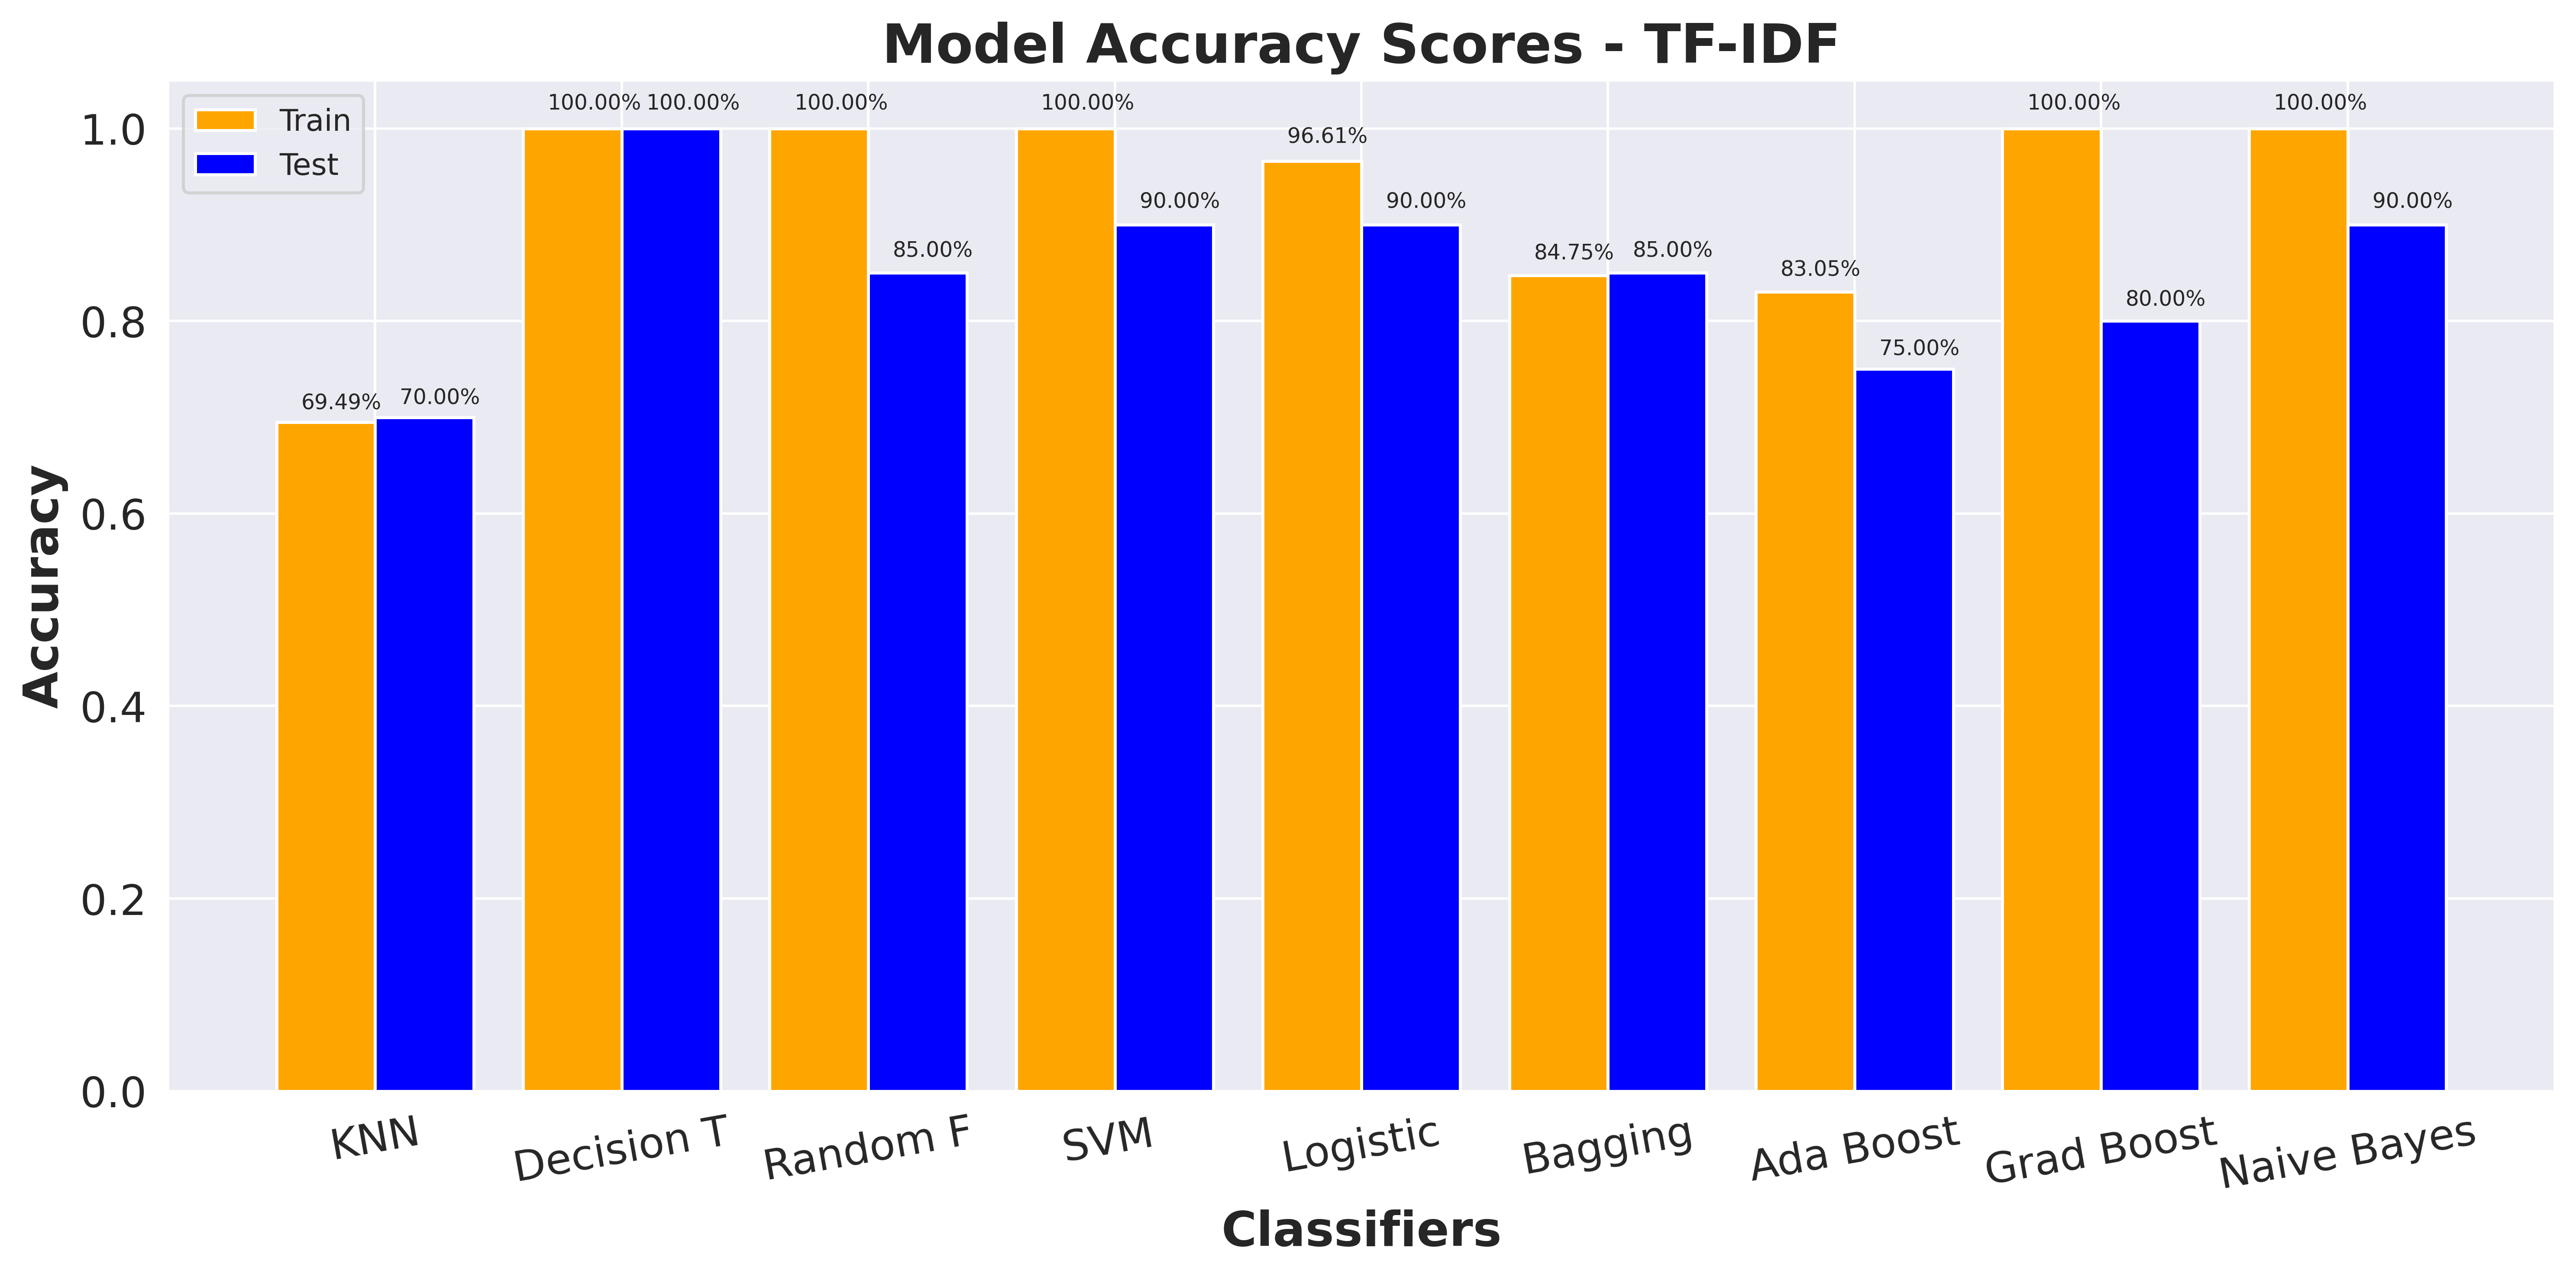

In [129]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores - TF-IDF", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### C6.1.2 Word2Vec

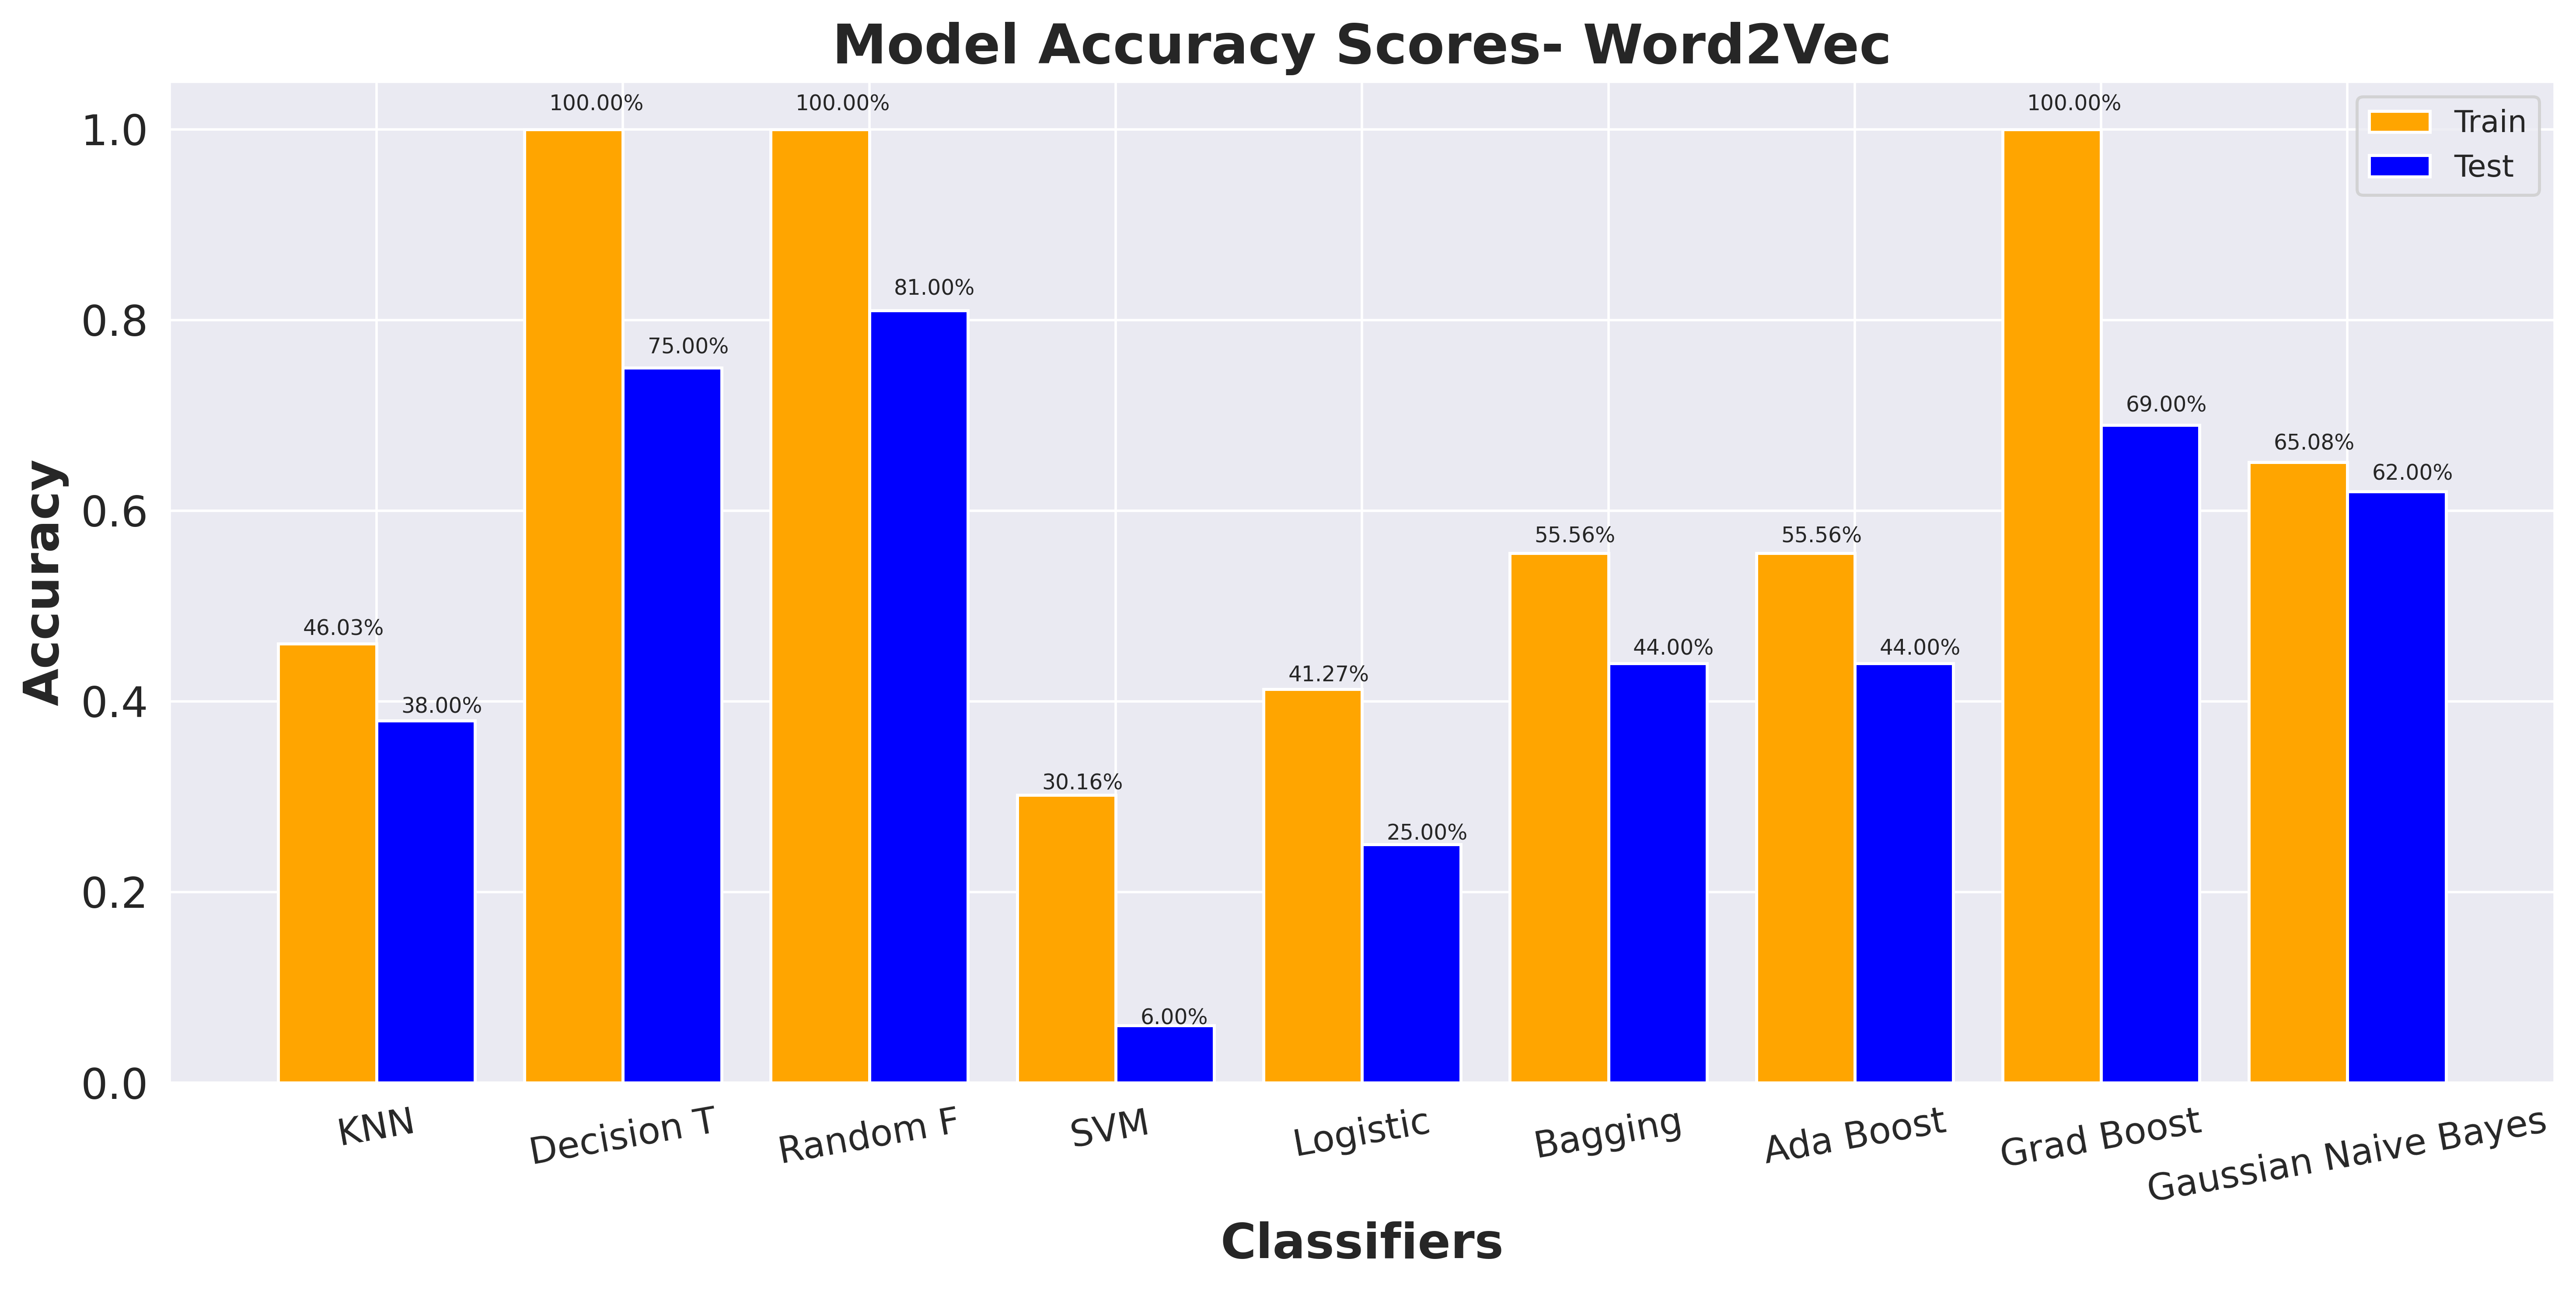

In [130]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table_org))
model_names_org = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Gaussian Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table_org['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table_org['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names_org)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores- Word2Vec", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies_org[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies_org[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# D. Model Deployment

## D1. Pickle File

In [131]:
# import pickle

# filename = 'modelSAPnew.pkl'
# pickle.dump(model_DT,open(filename,'wb'))
# pickle.dump(tfidf_vector,open(filename,'wb'))

In [135]:
import os
import pickle
import random
import string

# Define your models and vectorizers
models = {
    "KNN": model_knn,
    "DecisionTree": model_DT,
    "RandomForest": model_RF,
    "SVM": model_svm,
    "LogisticRegression": model_lgr,
    "Bagging": model_bagg,
    "AdaBoost": model_Adaboost,
    "GradientBoosting": model_GradientBoost,
    "GaussianNaiveBayes": model_NB,
    "KNN_org": model_knn_org,
    "DecisionTree_org": model_DT_org,
    "RandomForest_org": model_RF_org,
    "SVM_org": model_svm_org,
    "LogisticRegression_org": model_lgr_org,
    "Bagging_org": model_bagg_org,
    "AdaBoost_org": model_Adaboost_org,
    "GradientBoosting_org": model_GradientBoost_org,
    "GaussianNaiveBayes_org": model_NB_Gaussian
}

vectorizers = {
    "TF-IDF" : tfidf_vector,
    "Word2Vec" : word2vec_model_org
}

train_accuracies = {
    "KNN": model_knn.score(x_train, y_train)*100,
    "DecisionTree": model_DT.score(x_train, y_train)*100,
    "RandomForest": model_RF.score(x_train, y_train)*100,
    "SVM": model_svm.score(x_train, y_train)*100,
    "LogisticRegression": model_lgr.score(x_train, y_train)*100,
    "Bagging": model_bagg.score(x_train, y_train)*100,
    "AdaBoost": model_Adaboost.score(x_train, y_train)*100,
    "GradientBoosting": model_GradientBoost.score(x_train, y_train)*100,
    "GaussianNaiveBayes": model_NB.score(x_train, y_train)*100,
    "KNN_org": model_knn_org.score(X_train_org, y_train_org)*100,
    "DecisionTree_org": model_DT_org.score(X_train_org, y_train_org)*100,
    "RandomForest_org": model_RF_org.score(X_train_org, y_train_org)*100,
    "SVM_org": model_svm_org.score(X_train_org, y_train_org)*100,
    "LogisticRegression_org": model_lgr_org.score(X_train_org, y_train_org)*100,
    "Bagging_org": model_bagg_org.score(X_train_org, y_train_org)*100,
    "AdaBoost_org": model_Adaboost_org.score(X_train_org, y_train_org)*100,
    "GradientBoosting_org": model_GradientBoost_org.score(X_train_org, y_train_org)*100,
    "GaussianNaiveBayes_org": model_NB_Gaussian.score(X_train_org, y_train_org)*100
}

# filename = 'modelsSAPnew.pkl'
# file_path = f"./pkl/{filename}"

# if os.path.exists(file_path):
#     random_suffix = ''.join(random.choices(string.ascii_lowercase + string.digits, k=6))
#     base, ext = os.path.splitext(filename)
#     new_filename = f"{base}_{random_suffix}{ext}"
#     new_file_path = f"./{new_filename}"
# else:
#     new_file_path = file_path

# with open(new_file_path, 'wb') as file:
#     pickle.dump(models, file)
#     pickle.dump(vectorizers, file)
#     pickle.dump(train_accuracies, file)

# print(f"Saved as: {new_file_path}")

import os
import random
import string
import pickle

# Define filenames
model_filename = 'modelSAPnew.pkl'
vectorizer_filename = 'vectorizerSAPnew.pkl'

# Function to create a new filename if the file already exists
def get_new_filename(filename):
    base, ext = os.path.splitext(filename)
    if os.path.exists(filename):
        random_suffix = ''.join(random.choices(string.ascii_lowercase + string.digits, k=6))
        return f"{base}_{random_suffix}{ext}"
    return filename

# Get file paths, with new names if they already exist
model_file_path = get_new_filename(f"./pkl/{model_filename}")
vectorizer_file_path = get_new_filename(f"./pkl/{vectorizer_filename}")

# Save model
with open(model_file_path, 'wb') as model_file:
    pickle.dump(model_DT, model_file)

# Save vectorizer
with open(vectorizer_file_path, 'wb') as vectorizer_file:
    pickle.dump(tfidf_vector, vectorizer_file)

print(f"Model saved as: {model_file_path}")
print(f"Vectorizer saved as: {vectorizer_file_path}")


Model saved as: ./pkl/modelSAPnew_lr5i4k.pkl
Vectorizer saved as: ./pkl/vectorizerSAPnew.pkl


In [136]:


%%writefile Deploy.py


# IMPORT LIBRARIES
import re
import PyPDF2
import docx2txt
import pdfplumber
import pandas as pd
import streamlit as st
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#----------------------------------------------------------------------------------------------------

st.title('RESUME CLASSIFICATION')
st.markdown('<style>h1{color: Purple;}</style>', unsafe_allow_html=True)
st.subheader('Welcome to Resume Classification App')

# FUNCTIONS
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)
    noun_chunks = nlp_text.noun_chunks
    tokens = [token.text for token in nlp_text if not token.is_stop] # removing stop words and implementing word tokenization

    data = pd.read_csv(r"skills.csv") # reading the csv file
    skills = list(data.columns.values) # extract values       
    skillset = []

    for token in tokens: # check for one-grams (example: python)
        if token.lower() in skills:
            skillset.append(token)

    for token in noun_chunks: # check for bi-grams and tri-grams (example: machine learning)
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)   
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

def getText(filename):
    fullText = '' # Create empty string 
    if filename.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        doc = docx2txt.process(filename)
        for para in doc:
            fullText = fullText + para      
    else:  
        with pdfplumber.open(filename) as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
        for paragraph in page_content:
            fullText =  fullText + paragraph       
    return (fullText)

def display(doc_file):
    resume = []
    if doc_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        resume.append(docx2txt.process(doc_file))
    else:
        with pdfplumber.open(doc_file) as pdf:
            pages=pdf.pages[0]
            resume.append(pages.extract_text())  
    return resume

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words) 

file_type=pd.DataFrame([], columns=['Uploaded File',  'Predicted Profile','Skills',])
filename = []
predicted = []
skills = []

#-------------------------------------------------------------------------------------------------
# MAIN CODE
import pickle as pk
model = pk.load(open(r'pkl/modelSAP.pkl', 'rb'))
Vectorizer = pk.load(open(r'pkl/vectorizerSAPnew.pkl', 'rb'))

upload_file = st.file_uploader('Upload Your Resumes', type= ['docx','pdf'],accept_multiple_files=True)
  
for doc_file in upload_file:
    if doc_file is not None:
        filename.append(doc_file.name)
        cleaned = preprocess(display(doc_file))
        vect_pred = Vectorizer.transform([cleaned])
        prediction = model.predict(vect_pred)[0]
        predicted.append(prediction)
        extText = getText(doc_file)
        skills.append(extract_skills(extText))
        
if len(predicted) > 0:
    file_type['Uploaded File'] = filename
    file_type['Skills'] = skills
    file_type['Predicted Profile'] = predicted
    st.table(file_type.style.format())
    
select = ['PeopleSoft','SQL Developer','React JS Developer','Workday']
st.subheader('Select as per Requirement')
option = st.selectbox('Fields',select)

if option == 'PeopleSoft':
    st.table(file_type[file_type['Predicted Profile'] == 'PeopleSoft'])
elif option == 'SQL Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'SQL Developer'])
elif option == 'React JS Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'React JS Developer'])
elif option == 'Workday':
    st.table(file_type[file_type['Predicted Profile'] == 'Workday'])

Overwriting Deploy.py


In [137]:
!streamlit run Deploy.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.29.236:8501

2024-10-11 16:35:11.039 Uncaught app exception
Traceback (most recent call last):
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
             ^^^^^^
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/home/its_relative/folder/in_git_hub/resume-classification/Deploy.py", line 7, in <module>
    import pdfplumber
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/pdfplumber/__init__.py", line 15, in <module>
    from .pdf import PDF
  File "/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/pdfplumber/pdf.py", line 17, in <module>
    from .page import Page
  File 